In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [2]:
df_airline=pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [6]:
df_airline.dropna(axis=0,inplace=True)

In [8]:
df_airline["Thousands of Passengers"]=df_airline["Thousands of Passengers"].astype(int)

df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [9]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [10]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 2.8+ KB


In [12]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [10]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [11]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [15]:
df_airline.set_index('Month',inplace=True)

In [16]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

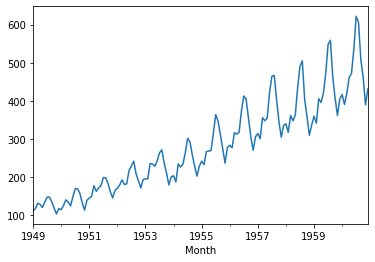

In [17]:
df_airline["Thousands of Passengers"].plot()

In [19]:
#  rolling statistics

roll = df_airline["Thousands of Passengers"].rolling(12).mean()

roll.head(15)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
Name: Thousands of Passengers, dtype: float64

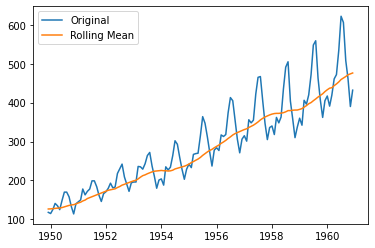

In [38]:
# roll.iloc[11:].plot()
# df_airline["Thousands of Passengers"].iloc[11:].plot()

org  =plt.plot(df_airline["Thousands of Passengers"].iloc[11:],label='Original')
mean = plt.plot(roll.iloc[11:],label='Rolling Mean')
plt.legend()
plt.show(block=False)


In [39]:
from statsmodels.tsa.stattools import adfuller

In [46]:
def adf_test(series):
    result=adfuller(series, autolag='AIC')
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [47]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060568
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [48]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [49]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


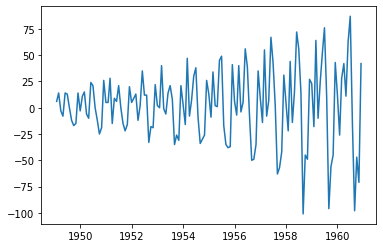

In [50]:
plt.plot(df_airline['Passengers First Difference'])

In [51]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241699928
p- value: 0.05421329028382636
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [52]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

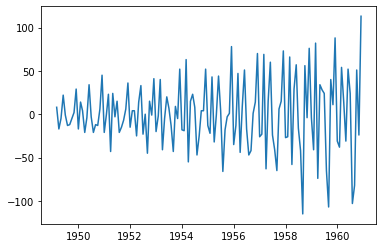

In [53]:
plt.plot(df_airline['Passengers Second Difference'])

In [54]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468505
p- value: 2.7328918500142407e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [58]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

df_airline.head(20)

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


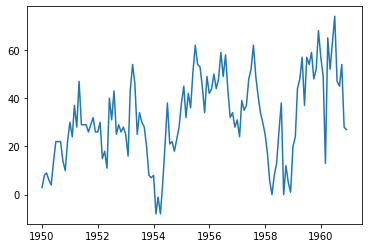

In [56]:
plt.plot(df_airline['Passengers 12 Difference'])

In [59]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [60]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

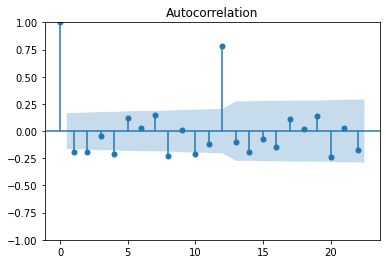

In [61]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

C:\Users\Rahul Agrawal\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


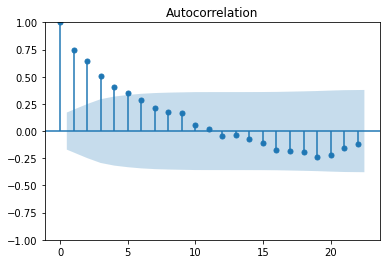

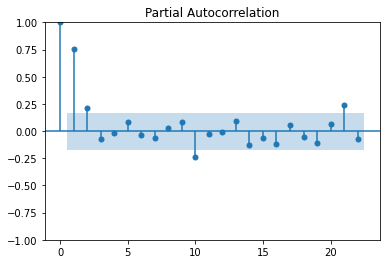

In [62]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

C:\Users\Rahul Agrawal\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


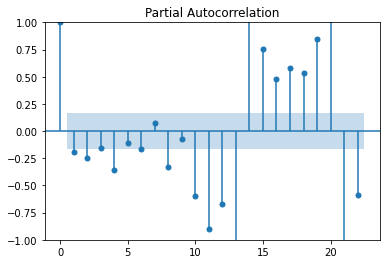

In [63]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

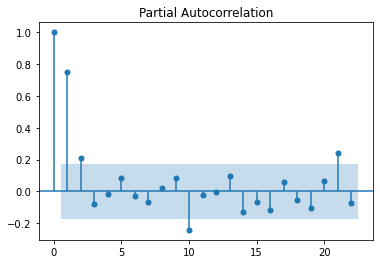

In [30]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [31]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [32]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [34]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [35]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [36]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [37]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [42]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [125]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [126]:
model_Arima_fit=model_ARIMA.fit()

In [127]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Sun, 27 Feb 2022   AIC                            775.563
Time:                                20:13:47   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [128]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,-18.162150,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,-45.477686,NaN
1956-03-01,317.0,40.0,47.0,50.0,36.823887,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,-13.751486,NaN
1956-05-01,318.0,5.0,9.0,48.0,-24.008603,NaN
1956-06-01,374.0,56.0,51.0,59.0,47.695447,NaN
1956-07-01,413.0,39.0,-17.0,49.0,-17.190004,399.012415
1956-08-01,405.0,-8.0,-47.0,58.0,-31.682662,382.942369
1956-09-01,355.0,-50.0,-42.0,43.0,45.053450,347.541878


In [112]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [113]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [114]:
pred

1956-01-01   -18.162150
1956-02-01   -45.477686
1956-03-01    36.823887
1956-04-01   -13.751486
1956-05-01   -24.008603
1956-06-01    47.695447
1956-07-01   -17.190004
1956-08-01   -31.682662
1956-09-01    45.053450
1956-10-01   -14.879861
1956-11-01   -29.599343
1956-12-01    45.461525
1957-01-01   -15.359948
1957-02-01   -30.599654
1957-03-01    45.359258
1957-04-01   -14.685594
1957-05-01   -30.678062
1957-06-01    45.253970
1957-07-01   -14.443474
1957-08-01   -31.010197
1957-09-01    45.198710
1957-10-01   -14.048689
1957-11-01   -31.275681
1957-12-01    45.107187
1958-01-01   -13.703068
1958-02-01   -31.553004
1958-03-01    45.028083
1958-04-01   -13.340926
1958-05-01   -31.826277
1958-06-01    44.939833
1958-07-01   -12.982495
1958-08-01   -32.097255
1958-09-01    44.850912
1958-10-01   -12.621965
1958-11-01   -32.366464
1958-12-01    44.758257
1959-01-01   -12.260914
1959-02-01   -32.633359
1959-03-01    44.662918
1959-04-01   -11.898998
1959-05-01   -32.898197
1959-06-01    44

In [115]:
residuals

Month
1956-01-01    302.162150
1956-02-01    322.477686
1956-03-01    280.176113
1956-04-01    326.751486
1956-05-01    342.008603
1956-06-01    326.304553
1956-07-01    430.190004
1956-08-01    436.682662
1956-09-01    309.946550
1956-10-01    320.879861
1956-11-01    300.599343
1956-12-01    260.538475
1957-01-01    330.359948
1957-02-01    331.599654
1957-03-01    310.640742
1957-04-01    362.685594
1957-05-01    385.678062
1957-06-01    376.746030
1957-07-01    479.443474
1957-08-01    498.010197
1957-09-01    358.801290
1957-10-01    361.048689
1957-11-01    336.275681
1957-12-01    290.892813
1958-01-01    353.703068
1958-02-01    349.553004
1958-03-01    316.971917
1958-04-01    361.340926
1958-05-01    394.826277
1958-06-01    390.060167
1958-07-01    503.982495
1958-08-01    537.097255
1958-09-01    359.149088
1958-10-01    371.621965
1958-11-01    342.366464
1958-12-01    292.241743
1959-01-01    372.260914
1959-02-01    374.633359
1959-03-01    361.337082
1959-04-01    407.8

<AxesSubplot:ylabel='Density'>

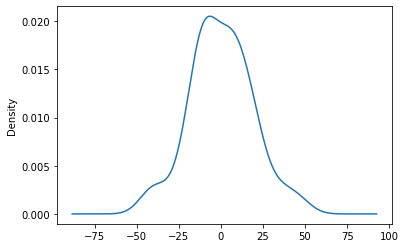

In [116]:
model_Arima_fit.resid.plot(kind='kde')

In [117]:
test_data['Predicted_ARIMA']=pred

C:\Users\win10\AppData\Local\Temp/ipykernel_32852/95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

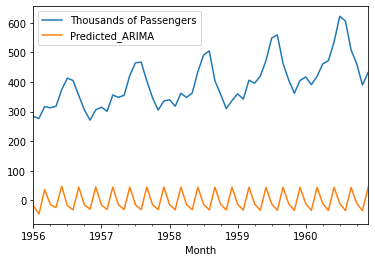

In [118]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

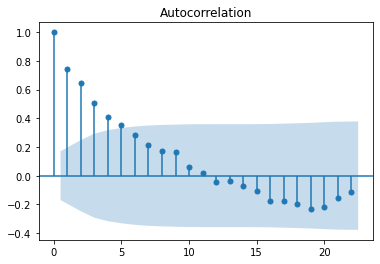

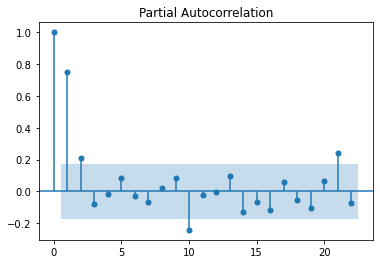

In [119]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [84]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [96]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [97]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [98]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:              Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(1, 1, [1], 12)   Log Likelihood                -263.918
Date:                              Sun, 27 Feb 2022   AIC                            549.836
Time:                                      20:07:02   BIC                            574.880
Sample:                                  01-01-1949   HQIC                           559.806
                                       - 12-01-1955                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5532      3.048      0.181      0.856      -5.421       6.527
ar.L2          0.8499      0.367      2.318      0.020       0.131       1.568
ar.L3         -0.4143      2.779     -0.149      0.881      -5.861       5.032
ma.L1          0.2055      2.967      0.069      0.945      -5.609       6.020
ma.L2         -0.5098      2.189     -0.233      0.816      -4.800       3.780
ma.L3         -0.0916      0.642     -0.143      0.887      -1.350       1.167
ma.L4         -0.1883      0.479     -0.393      0.694      -1.127       0.750
ma.L5          0.1676      0.826      0.203      0.839      -1.451       1.786
ar.S.L12      -0.3096      0.868     -0.357      0.721      -2.011       1.392
ma.S.L12       0.1029      0.954      0.108      0.914      -1.766       1.972
sigma2        83.8549     28.404      2.952      0.003      28.184     139.526
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.93   Prob(JB):                         0.38
Heteroskedasticity (H):               2.41   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,0.0574,2559.875517
1960-09-01,508.0,-98.0,-82.0,45.0,0.0574,2583.976044
1960-10-01,461.0,-47.0,51.0,54.0,0.0574,2608.365234
1960-11-01,390.0,-71.0,-24.0,28.0,0.0574,2633.890859
1960-12-01,432.0,42.0,113.0,27.0,0.0574,2726.249847


In [102]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [120]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

C:\Users\win10\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

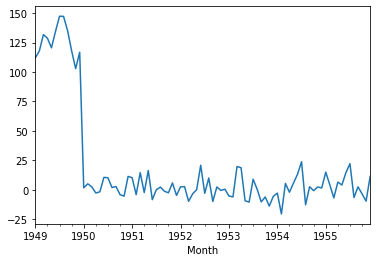

In [121]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

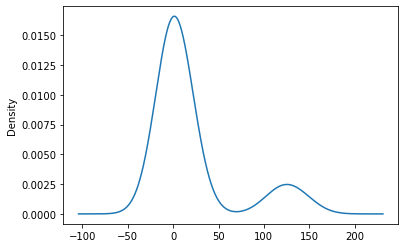

In [122]:
model_SARIMA_fit.resid.plot(kind='kde')

In [123]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\win10\AppData\Local\Temp/ipykernel_32852/1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [94]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,2.909341,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,-1.874060,NaN
1956-03-01,317.0,40.0,47.0,50.0,-27.004647,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,-17.471389,NaN
1956-05-01,318.0,5.0,9.0,48.0,-31.452655,NaN
1956-06-01,374.0,56.0,51.0,59.0,26.843422,NaN
1956-07-01,413.0,39.0,-17.0,49.0,26.892167,NaN
1956-08-01,405.0,-8.0,-47.0,58.0,-20.461356,NaN
1956-09-01,355.0,-50.0,-42.0,43.0,28.590874,NaN


<AxesSubplot:xlabel='Month'>

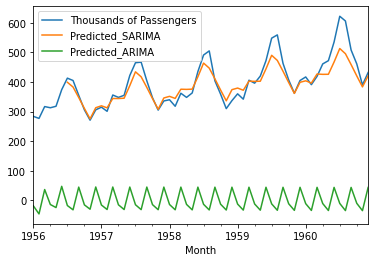

In [124]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()